In [159]:
# Import Dependencies
import numpy as np
import pandas as pd
from scipy import stats
import pathlib
from matplotlib import pyplot as plt

In [160]:
#Import Outpout_income_data file
csv_path = pathlib.Path("Output_income_data.csv")

income_city_df = pd.read_csv(csv_path)

income_city_df.dropna()

Census Tract  Neighborhood   Latitude   Longitude  Population  \
0           101110       Tujunga  34.259555 -118.293602      4314.0   
1           101122       Tujunga  34.267357 -118.290240      3239.0   
2           101210       Tujunga  34.251998 -118.292687      6052.0   
3           101220       Tujunga  34.251190 -118.281014      3497.0   
4           101300       Tujunga  34.245595 -118.271731      4297.0   
...            ...           ...        ...         ...         ...   
2317        980031     San Pedro  33.737510 -118.261426      1113.0   
2318        124700  Sherman Oaks  34.162467 -118.413865      5697.0   
2319        503801     La Mirada  33.899103 -117.993649      3847.0   
2320        573902    Long Beach  33.811974 -118.078653      1979.0   
2321        576602    Long Beach  33.765980 -118.170779      4369.0   

      Median Age  Household Income  Per Capita Income  Poverty Count  \
0           40.6           53077.0            26996.0          679.0   
1           52.3           88953.0            46974.0          109.0   
2           36.6           32119.0            19902.0         1994.0   
3           39.7           41728.0            21844.0          524.0   
4           49.7           86914.0            35120.0          391.0   
...          ...               ...                ...            ...   
2317        44.1           64500.0             9765.0            0.0   
2318        40.2           90795.0            55921.0          286.0   
2319        36.9           93398.0            29261.0          381.0   
2320        49.9          126250.0            61849.0           41.0   
2321        37.5           65192.0            48098.0          789.0   

      Poverty Rate  Unemployment Rate  
0            15.74               3.85  
1             3.37               2.90  
2            32.95               5.30  
3            14.98               3.77  
4             9.10               2.91  
...            ...                ...  
2317          0.00               0.00  
2318          5.02               1.30  
2319          9.90               4.55  
2320          2.07               0.71  
2321         18.06               2.24  

[2308 rows x 11 columns]

C:\Users\fabio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\fabio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


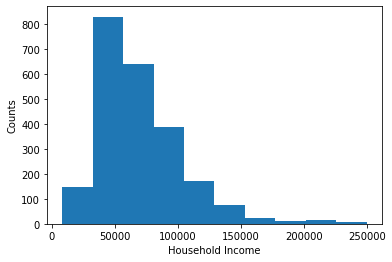

In [161]:
#Generate a histogram with Los Angeles County Income distribution
plt.hist(income_city_df["Household Income"])
plt.xlabel('Household Income')
plt.ylabel('Counts')
plt.savefig("los_angeles_income.png")
plt.show()

In [162]:
#Calculate and print the average, median, and mode income in LA County
avg_income=round(income_city_df["Household Income"].mean(),2)
median_income=income_city_df["Household Income"].median()
mode_income=income_city_df["Household Income"].mode()
std_income=round(income_city_df["Household Income"].std(),2)
print(f" The average income in LA County: ${avg_income}")
print(f" The median income in LA County: ${median_income}")
print(f" The income standard deviation is: ${std_income}")
print(f" The income mode in LA County: ${mode_income}")

 The average income in LA County: $69678.02
 The median income in LA County: $62910.0
 The income standard deviation is: $33871.1
 The income mode in LA County: $0    45000.0
1    52917.0
2    55000.0
3    68125.0
dtype: float64


In [163]:
# Determine if there are any potential outliers in the average income in Los Angeles County
quartiles = income_city_df["Household Income"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of income is: {lowerq}")
print(f"The upper quartile of income is: {upperq}")
print(f"The interquartile range of income is: {iqr}")
print(f"The the median of income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of income is: 45000.0
The upper quartile of income is: 85972.25
The interquartile range of income is: 40972.25
The the median of income is: 62910.0 
Values below -16458.375 could be outliers.
Values above 147430.625 could be outliers.


In [164]:
#Calculate the average poverty rate in Los Angeles County
avg_pov_rate=round(income_city_df["Poverty Rate"].mean(),2)

avg_pov_rate

15.98

In [165]:
#Calculate the average unemployment rate in Los Angeles County
avg_unemp_rate= round(income_city_df["Unemployment Rate"].mean(),2)
avg_unemp_rate

3.56